In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [2]:
offerings = pd.read_csv('data/offerings.csv')

reviews = pd.read_csv('data/reviews.csv')


In [3]:
offerings.head()


,hotel_class,region_id,url,phone,details,address,type,id,name
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '147 West 4...",hotel,113317,Casablanca Hotel Times Square
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,NaN,NaN,"{'region': 'CA', 'street-address': '300 S Dohe...",hotel,76049,Four Seasons Hotel Los Angeles at Beverly Hills
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '790 Eighth...",hotel,99352,Hilton Garden Inn Times Square
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '152 West 5...",hotel,93589,The Michelangelo Hotel
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '130 West 4...",hotel,217616,The Muse Hotel New York


In [4]:
reviews.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False


In [5]:
offerings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hotel_class  3141 non-null   float64
 1   region_id    4333 non-null   int64  
 2   url          4333 non-null   object 
 3   phone        0 non-null      float64
 4   details      0 non-null      float64
 5   address      4333 non-null   object 
 6   type         4333 non-null   object 
 7   id           4333 non-null   int64  
 8   name         4333 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 304.8+ KB


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878561 entries, 0 to 878560
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ratings            878561 non-null  object
 1   title              878561 non-null  object
 2   text               878561 non-null  object
 3   author             878561 non-null  object
 4   date_stayed        810967 non-null  object
 5   offering_id        878561 non-null  int64 
 6   num_helpful_votes  878561 non-null  int64 
 7   date               878561 non-null  object
 8   id                 878561 non-null  int64 
 9   via_mobile         878561 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 61.2+ MB


In [7]:
print(offerings.isnull().sum())
print(reviews.isnull().sum())

offerings.drop_duplicates(inplace=True)
reviews.drop_duplicates(inplace=True)

offerings.fillna('Unknown', inplace=True)
reviews.dropna(subset=['text'], inplace=True)


hotel_class    1192
region_id         0
url               0
phone          4333
details        4333
address           0
type              0
id                0
name              0
dtype: int64
ratings                  0
title                    0
text                     0
author                   0
date_stayed          67594
offering_id              0
num_helpful_votes        0
date                     0
id                       0
via_mobile               0
dtype: int64


/var/folders/bb/rx_p8sh57r19xkmxl14ylgch0000gn/T/ipykernel_24008/3329970411.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  offerings.fillna('Unknown', inplace=True)


In [8]:
offerings.describe()

,region_id,id
count,4333.000000,4.333000e+03
mean,50259.880683,4.733547e+05
std,12182.151392,6.591538e+05
min,28970.000000,7.257200e+04
25%,35805.000000,9.866400e+04
50%,56003.000000,1.262570e+05
75%,60763.000000,5.757320e+05
max,60956.000000,3.671817e+06


In [9]:
reviews.describe()

,offering_id,num_helpful_votes,id
count,8.785610e+05,878561.000000,8.785610e+05
mean,3.058972e+05,1.153104,8.633481e+07
std,4.388314e+05,2.898120,4.999254e+07
min,7.257200e+04,0.000000,2.243990e+05
25%,8.999800e+04,0.000000,3.488850e+07
50%,1.114080e+05,0.000000,1.113905e+08
75%,2.416400e+05,1.000000,1.283089e+08
max,3.574675e+06,515.000000,1.478017e+08


/var/folders/bb/rx_p8sh57r19xkmxl14ylgch0000gn/T/ipykernel_24008/2702662864.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='overall_rating', palette='viridis', order=sorted(reviews['overall_rating'].unique()))


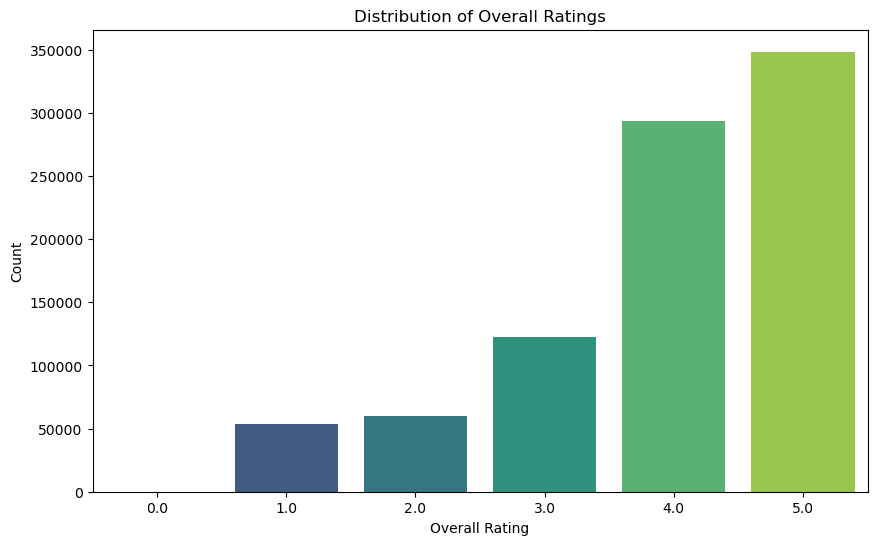

In [10]:
import ast

# Extract 'overall' ratings from the dictionaries in the ratings column
def extract_overall_rating(rating):
    try:
        rating_dict = ast.literal_eval(rating)  # Safely parse the dictionary
        return rating_dict.get('overall', None)  # Extract the 'overall' rating if it exists
    except (ValueError, SyntaxError):
        return None

# Apply the function to extract overall ratings
reviews['overall_rating'] = reviews['ratings'].apply(extract_overall_rating)

# Drop rows where overall_rating is missing
reviews = reviews.dropna(subset=['overall_rating'])

# Convert the ratings to numeric for visualization
reviews['overall_rating'] = pd.to_numeric(reviews['overall_rating'])

# Plot the distribution of overall ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=reviews, x='overall_rating', palette='viridis', order=sorted(reviews['overall_rating'].unique()))
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()


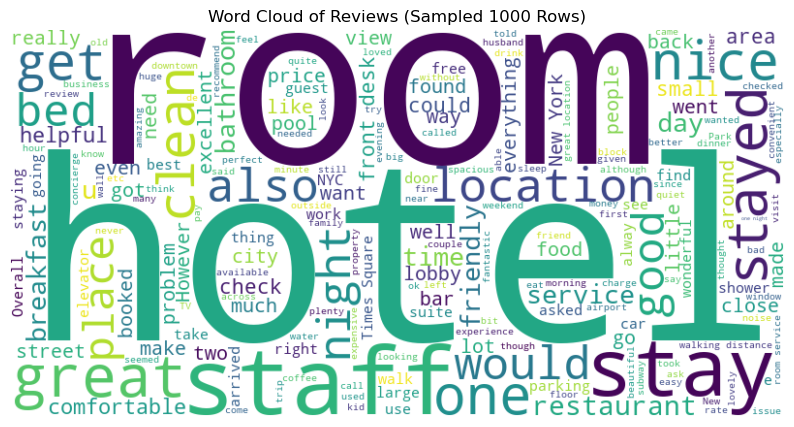

In [11]:
if 'text' in reviews.columns:
    sampled_reviews = reviews.sample(n=10000, random_state=42)
    stop_words = set(stopwords.words('english'))
    review_text = ' '.join(sampled_reviews['text'].dropna())
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(review_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews (Sampled 1000 Rows)')
    plt.show()

In [12]:
# Expand and inspect the 'author' column if it exists
if 'author' in reviews.columns:
    # Check the first few rows of the 'author' column
    print("Sample Data from the 'author' Column:")
    print(reviews['author'].head())
    
    # If the 'author' column contains dictionaries or JSON strings, parse them
    try:
        # Convert string representation of dictionaries to actual dictionaries
        reviews['author_parsed'] = reviews['author'].apply(eval)
        
        # Expand nested fields into separate columns
        author_df = pd.json_normalize(reviews['author_parsed'])
        print("Expanded 'author' DataFrame:")
        print(author_df.head())
        
        # Merge expanded data back into the main DataFrame (optional)
        reviews = pd.concat([reviews.drop(columns=['author']), author_df], axis=1)
    except Exception as e:
        print("Error parsing the 'author' column:", e)



Sample Data from the 'author' Column:
0    {'username': 'Papa_Panda', 'num_cities': 22, '...
1    {'username': 'Maureen V', 'num_reviews': 2, 'n...
2    {'username': 'vuguru', 'num_cities': 12, 'num_...
3    {'username': 'Hotel-Designer', 'num_cities': 5...
4    {'username': 'JamesE339', 'num_cities': 34, 'n...
Name: author, dtype: object
Expanded 'author' DataFrame:
         username  num_cities  num_helpful_votes  num_reviews  \
0      Papa_Panda        22.0               12.0         29.0   
1       Maureen V         2.0                NaN          2.0   
2          vuguru        12.0               17.0         14.0   
3  Hotel-Designer         5.0               26.0          5.0   
4       JamesE339        34.0               65.0        104.0   

   num_type_reviews                                id  \
0              24.0  8C0B42FF3C0FA366A21CFD785302A032   
1               NaN  E3C85CA9DBBBC77E0DB534ABE93E4713   
2              14.0  FB1032DECE1162CB3556D05F278AAFFD   
3          

In [13]:
reviews.head()

,ratings,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,overall_rating,author_parsed,username,num_cities,num_helpful_votes,num_reviews,num_type_reviews,id,location
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,December 2012,93338,0,2012-12-17,147643103,False,5.0,"{'username': 'Papa_Panda', 'num_cities': 22, '...",Papa_Panda,22.0,12.0,29.0,24.0,8C0B42FF3C0FA366A21CFD785302A032,Gold Coast
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",December 2012,93338,0,2012-12-17,147639004,False,5.0,"{'username': 'Maureen V', 'num_reviews': 2, 'n...",Maureen V,2.0,NaN,2.0,NaN,E3C85CA9DBBBC77E0DB534ABE93E4713,"Sydney, New South Wales, Australia"
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,December 2012,1762573,0,2012-12-18,147697954,False,4.0,"{'username': 'vuguru', 'num_cities': 12, 'num_...",vuguru,12.0,17.0,14.0,14.0,FB1032DECE1162CB3556D05F278AAFFD,Houston
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,August 2012,1762573,0,2012-12-17,147625723,False,4.0,"{'username': 'Hotel-Designer', 'num_cities': 5...",Hotel-Designer,5.0,26.0,5.0,5.0,EC3E275EE7590694889C8C7EE0D13961,"Laguna Beach, CA"
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,December 2012,1762573,0,2012-12-17,147612823,False,4.0,"{'username': 'JamesE339', 'num_cities': 34, 'n...",JamesE339,34.0,65.0,104.0,49.0,BA524A238B1171206691A6CC3F28F266,"Saint Louis, Missouri"


In [14]:
num_of_users = reviews["username"].nunique()

In [15]:
num_of_reviews = reviews.shape[0]

In [16]:
avg_review_per_user = num_of_reviews / num_of_users
avg_review_per_user

1.6362002562612672

In [17]:
if 'offering_id' in reviews.columns and 'id' in offerings.columns:
    reviews_with_hotels = reviews.merge(offerings, left_on='offering_id', right_on='id', how='left')
    print("\nJoined Reviews with Offerings:")
    print(reviews_with_hotels.head())
    # Save the joined table
    reviews_with_hotels.to_csv('data/reviews_with_hotels.csv', index=False)


Joined Reviews with Offerings:
                                             ratings  \
0  {'service': 5.0, 'cleanliness': 5.0, 'overall'...   
1  {'service': 5.0, 'cleanliness': 5.0, 'overall'...   
2  {'service': 4.0, 'cleanliness': 5.0, 'overall'...   
3  {'service': 5.0, 'cleanliness': 5.0, 'overall'...   
4  {'service': 4.0, 'cleanliness': 5.0, 'overall'...   

                                             title  \
0        “Truly is "Jewel of the Upper Wets Side"”   
1                        “My home away from home!”   
2                                     “Great Stay”   
3                             “Modern Convenience”   
4  “Its the best of the Andaz Brand in the US....”   

                                                text    date_stayed  \
0  Stayed in a king suite for 11 nights and yes i...  December 2012   
1  On every visit to NYC, the Hotel Beacon is the...  December 2012   
2  This is a great property in Midtown. We two di...  December 2012   
3  The Andaz is a nice

In [18]:
reviews_with_hotels.head()

,ratings,title,text,date_stayed,offering_id,num_helpful_votes,date,id_x,via_mobile,overall_rating,...,location,hotel_class,region_id,url,phone,details,address,type,id_y,name
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,December 2012,93338,0,2012-12-17,147643103,False,5.0,...,Gold Coast,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,Unknown,Unknown,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,93338,Hotel Beacon
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",December 2012,93338,0,2012-12-17,147639004,False,5.0,...,"Sydney, New South Wales, Australia",3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,Unknown,Unknown,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,93338,Hotel Beacon
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,December 2012,1762573,0,2012-12-18,147697954,False,4.0,...,Houston,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,Unknown,Unknown,"{'region': 'NY', 'street-address': '485 5th Av...",hotel,1762573,Andaz 5th Avenue
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,August 2012,1762573,0,2012-12-17,147625723,False,4.0,...,"Laguna Beach, CA",4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,Unknown,Unknown,"{'region': 'NY', 'street-address': '485 5th Av...",hotel,1762573,Andaz 5th Avenue
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,December 2012,1762573,0,2012-12-17,147612823,False,4.0,...,"Saint Louis, Missouri",4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,Unknown,Unknown,"{'region': 'NY', 'street-address': '485 5th Av...",hotel,1762573,Andaz 5th Avenue


In [19]:
reviews_with_hotels.shape

(878561, 27)

/var/folders/bb/rx_p8sh57r19xkmxl14ylgch0000gn/T/ipykernel_24008/1273003527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews_with_hotels, x='hotel_class', palette='viridis',


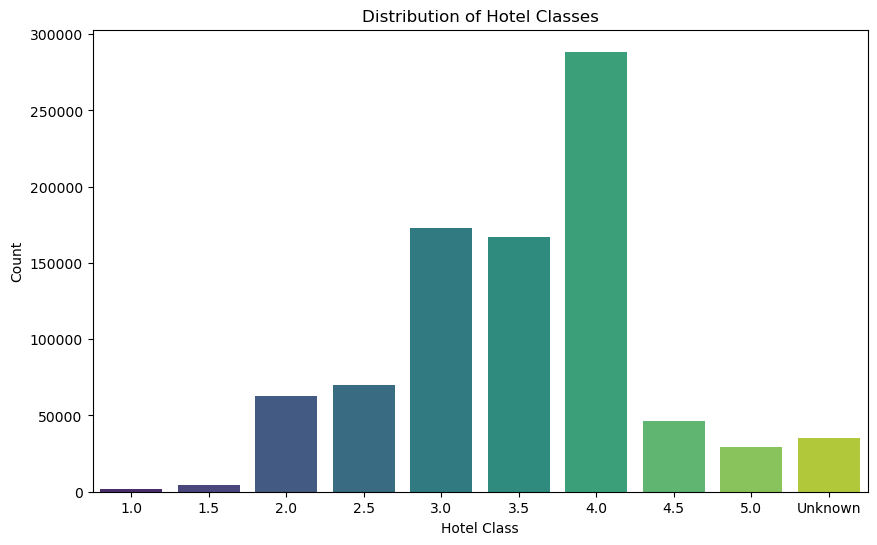

In [22]:
if 'hotel_class' in reviews_with_hotels.columns:
    # Convert hotel_class to string to avoid comparison issues
    reviews_with_hotels['hotel_class'] = reviews_with_hotels['hotel_class'].astype(str)
    plt.figure(figsize=(10, 6))
    sns.countplot(data=reviews_with_hotels, x='hotel_class', palette='viridis', 
                  order=sorted(reviews_with_hotels['hotel_class'].dropna().unique()))
    plt.title('Distribution of Hotel Classes')
    plt.xlabel('Hotel Class')
    plt.ylabel('Count')
    plt.show()

In [26]:
if 'username' in reviews.columns:
    avg_reviews_per_user = reviews.groupby('username').size().mean()
    print(f"\nAverage Number of Reviews per User: {avg_reviews_per_user}")

if 'offering_id' in reviews.columns:
    avg_reviews_per_hotel = reviews.groupby('offering_id').size().mean()
    print(f"\nAverage Number of Reviews per Hotel: {avg_reviews_per_hotel}")



Average Number of Reviews per User: 1.6362002562612672

Average Number of Reviews per Hotel: 222.7024081115336


In [27]:
if 'username' in reviews.columns:
    user_review_counts = reviews['username'].value_counts()
    users_with_more_than_20_reviews = user_review_counts[user_review_counts > 20].index
    reviews = reviews[reviews['username'].isin(users_with_more_than_20_reviews)]
    print("\nFiltered Reviews for Users with More Than 20 Reviews:")
    print(reviews.head())



Filtered Reviews for Users with More Than 20 Reviews:
                                               ratings  \
14   {'service': 5.0, 'cleanliness': 5.0, 'overall'...   
80   {'service': 5.0, 'cleanliness': 5.0, 'overall'...   
98   {'service': 4.0, 'cleanliness': 5.0, 'overall'...   
145  {'service': 5.0, 'cleanliness': 5.0, 'overall'...   
153                                   {'overall': 5.0}   

                                              title  \
14                         “Best hotel in New York”   
80                         “Spoiled Rotten in NYC!”   
98                           “Better Than Expected”   
145  “The sort of hotel stay everyone should have.”   
153                           “Incredibly pleased!”   

                                                  text    date_stayed  \
14   The service, location, cleanliness were outsta...  November 2012   
80   The Sherry is my home away from home. My busin...    August 2012   
98   Our room was bigger than expected and qui

In [28]:
if 'username' in reviews.columns:
    avg_reviews_per_user = reviews.groupby('username').size().mean()
    print(f"\nAverage Number of Reviews per User: {avg_reviews_per_user}")

if 'offering_id' in reviews.columns:
    avg_reviews_per_hotel = reviews.groupby('offering_id').size().mean()
    print(f"\nAverage Number of Reviews per Hotel: {avg_reviews_per_hotel}")


Average Number of Reviews per User: 190.96074380165288

Average Number of Reviews per Hotel: 28.25588505044329


In [30]:
reviews.shape

(92425, 18)